In [27]:
config_path = 'config.yaml'

# import packages

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
import yaml
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pdb

# load configuration

In [29]:
config = yaml.safe_load(open(config_path, 'rb'))

In [30]:
fit_intercept = config['fit_intercept']
alpha = config['chart_alpha']

# dataset

Download the [spambase](https://archive-beta.ics.uci.edu/dataset/94/spambase) dataset from UCI Machine Learning repository.

## Prepare column names

In [31]:
lines = open('data/spambase.names').readlines()
lines = lines[33:]
colnames = [x.split(':')[0] for x in lines]
colnames.append('spam_class')
len(colnames), colnames

(58,
 ['word_freq_make',
  'word_freq_address',
  'word_freq_all',
  'word_freq_3d',
  'word_freq_our',
  'word_freq_over',
  'word_freq_remove',
  'word_freq_internet',
  'word_freq_order',
  'word_freq_mail',
  'word_freq_receive',
  'word_freq_will',
  'word_freq_people',
  'word_freq_report',
  'word_freq_addresses',
  'word_freq_free',
  'word_freq_business',
  'word_freq_email',
  'word_freq_you',
  'word_freq_credit',
  'word_freq_your',
  'word_freq_font',
  'word_freq_000',
  'word_freq_money',
  'word_freq_hp',
  'word_freq_hpl',
  'word_freq_george',
  'word_freq_650',
  'word_freq_lab',
  'word_freq_labs',
  'word_freq_telnet',
  'word_freq_857',
  'word_freq_data',
  'word_freq_415',
  'word_freq_85',
  'word_freq_technology',
  'word_freq_1999',
  'word_freq_parts',
  'word_freq_pm',
  'word_freq_direct',
  'word_freq_cs',
  'word_freq_meeting',
  'word_freq_original',
  'word_freq_project',
  'word_freq_re',
  'word_freq_edu',
  'word_freq_table',
  'word_freq_conference

## Read the data

In [32]:
# reading csv files
df =  pd.read_csv('data/spambase.data', sep=",", header = None)
df.columns = colnames
df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [33]:
df.shape

(4601, 58)

In [34]:
df_corr = df.corr()
df_corr.head().iloc[:,:5]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000


In [35]:
fig = px.imshow(df_corr, text_auto=True)
fig.show()

# Simple linear regression

Given a dataset of variables $(X_i, Y_i)$ where $X_i$ is the explanatory variable and $Y_i$ is the dependent variable that varies as $X_i$ does, the simplest model that could be applied for the relation between two of them is a linear one. Simple linear regression model is as follows:

$$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i $$

$\epsilon_i$ -  is the random component of the regression handling the residue, i.e. the lag between the estimation and actual value of the dependent parameter.  
$\beta_0$ - constant term or the intercept  
$\beta_1$ - coefficient term or slope of the intercept line

**Loss function**  
Mean squared error

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$$  
$n$ - number of observations  
$\hat{Y_i}$ - predicted value  
$Y_i$ - observed value

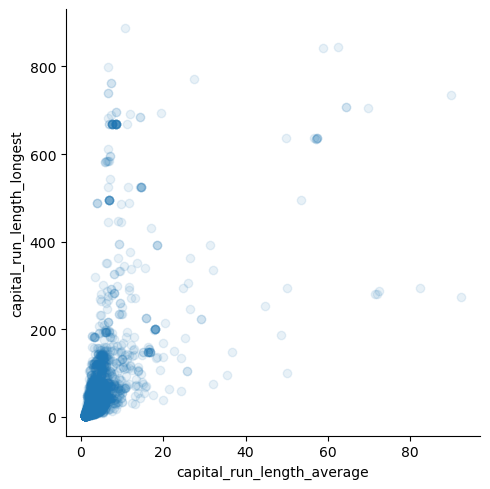

In [36]:
condition = (df['capital_run_length_average'] < 100) & (df['capital_run_length_longest'] < 1000)
sns.lmplot(x='capital_run_length_average',y='capital_run_length_longest',
           data=df[condition],
           fit_reg=False, 
          scatter_kws={'alpha':alpha}) 

Correlation

In [37]:
df.corr()['capital_run_length_average']['capital_run_length_longest']

0.49263829723867375

In [38]:
x = df['capital_run_length_average'].to_frame()
y = df['capital_run_length_longest']
model = LinearRegression(fit_intercept = fit_intercept)
model.fit(x, y)
y_pred = model.predict(x)

Coefficient of determination $R^{2}$

In [39]:
model.score(x,y)

0.24269249190622155

Mean squared error $MSE$

In [40]:
mean_squared_error(y, y_pred)

28758.273419688536

Coefficient $\beta_1$

In [41]:
model.coef_

array([3.02592471])

Intercept $\beta_0$

In [42]:
model.intercept_

36.46365470176502

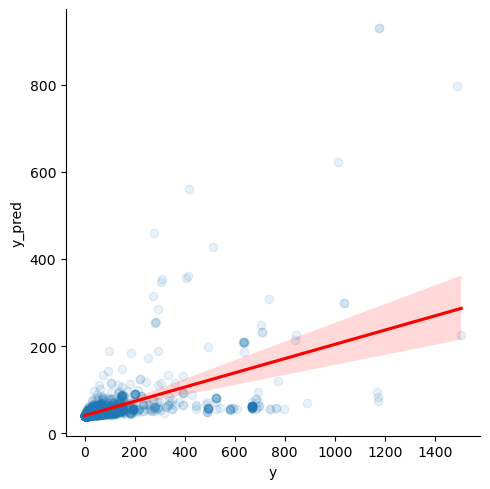

In [43]:
df_vis = pd.DataFrame({'y':y, 'y_pred':y_pred})
df_vis = df_vis.loc[(df_vis['y'] < 2000) & (df_vis['y_pred'] < 1000),:]
sns.lmplot(x='y',y='y_pred',
           data=df_vis,
           fit_reg=True, 
           line_kws={'color': 'red'},
          scatter_kws={'alpha':0.1}) 

# R in Python notebook

In [44]:
%reload_ext rpy2.ipython

In [45]:
%%R
if (!require('lazyeval')) install.packages('lazyeval',repos='https://cloud.r-project.org/');

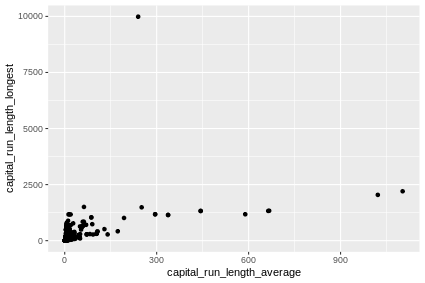

In [46]:
%%R -i df -w 15 -h 10 --units cm 

library("ggplot2")

ggplot(df, 
       aes(x = capital_run_length_average, y = capital_run_length_longest)) + 
geom_point()

In [47]:
%%R -i df -o intercept_r -o coef_r -o y_pred_r

model <- lm(capital_run_length_longest ~ capital_run_length_average, data = df)
print(model)

intercept_r <- coef(model)['(Intercept)']
coef_r <- coef(model)['capital_run_length_average']
y_pred_r <- predict(model)


Call:
lm(formula = capital_run_length_longest ~ capital_run_length_average, 
    data = df)

Coefficients:
               (Intercept)  capital_run_length_average  
                    36.464                       3.026  



In [48]:
intercept_r, coef_r, type(intercept_r)

(array([36.4636547]), array([3.02592471]), numpy.ndarray)

In [51]:
y_pred_r, type(y_pred_r)

(array([47.8290279 , 51.93823365, 66.18126125, ..., 40.71205299,
        39.93439034, 40.24606059]),
 numpy.ndarray)

# other functionality

## embedding HTML

In [49]:
from IPython.display import HTML
HTML('<h1>It seems embedding HTML works!!!</h1>')

## embedding images

![alternative text](newplot.png)

## ipywidgets

In [57]:
v1 = widgets.Combobox(
    value = 'word_freq_make',
    placeholder='Choose variable 1',
    options=colnames,
    description='var1',
    ensure_option=True,
    disabled=False
)
v2 = widgets.Combobox(
    value = 'word_freq_all',
    placeholder='Choose variable 2',
    options=colnames,
    description='var2',
    ensure_option=True,
    disabled=False
)
reg = widgets.Checkbox(
    value=False,
    description='Fit regresson',
    disabled=False,
    indent=False
)



# An HBox lays out its children horizontally
ui = widgets.HBox([v1, v2, reg])

#pdb.set_trace()

def plot_reg(m, c, reg):
    sns.lmplot(x=m,y=c,
               data=df,
               fit_reg=False, 
              scatter_kws={'alpha':alpha}) 
    plt.show()
    
    if reg:
        x = df[m].to_frame()
        y = df[c]
        model = LinearRegression(fit_intercept = fit_intercept)
        model.fit(x, y)
        y_pred = model.predict(x)
        r2 = model.score(x,y)
        print(f'Coeficient of deternination R^2 = {r2}')
    

out = widgets.interactive_output(plot_reg, {'m': v1, 'c': v2, 'reg':reg})

display(out, ui)

Output()

# Exercises

1. write latex equation for mean absolute error
2. create a table with Markdown with evaluation metrics of our regression model and their values
3. select 2 variables from our dataset you think might correlate and plot their scatterplot with seaborn
4. create a simple regression model of these variables and evaluate it with $R^{2}$ and $MSE$
5. parameterize variables used in regression model: add target_variable and input_variable to config file and adapt accordingly the notebook

# References

1. Markdown [cheatsheet](https://www.markdownguide.org/cheat-sheet/)
2. Latex [reference](https://en.wikibooks.org/wiki/LaTeX/Mathematics)
3. Latex machine learning equations [link](https://blmoistawinde.github.io/ml_equations_latex)
4. Simple linear regression [reference](https://en.wikipedia.org/wiki/Simple_linear_regression)
5. rpy2 package [reference](https://rpy2.github.io/doc/v3.5.x/html/introduction.html#)
6. R magic [reference](https://ipython.org/ipython-doc/2/config/extensions/rmagic.html)
7. Nbparametrise [reference](https://github.com/takluyver/nbparameterise)